## CHALLENGE 7 & 8


Topic: Challenge Set 7 & 8  
Subject: classification exploration  
Date of Submission: 10/22/2018   
Name: Andrée Werner  


## Challenge 7

## challenge1
- Load the data into a pandas dataframe. Replace 'y's with 1s, 'n's with 0s.
- So, convert each ? to this probability (when yes=1 and no=0, this is the mean of the column)


In [6]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [7]:
columns = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
congressional_votes = pd.read_csv("/Users/andreewerner/Desktop/house-votes-84.data", names=columns)

In [8]:
congressional_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [9]:
## Change y's and 1's to n's and 0's
congressional_votes.replace(to_replace='y', value=1, inplace=True)
congressional_votes.replace(to_replace='n', value=0, inplace=True)

In [10]:
## Replace all ?'s with the mean
congressional_votes.replace(to_replace='?', value=np.nan, inplace=True)
congressional_votes.fillna(congressional_votes.mean(), inplace=True)
congressional_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


## challenge2
- Split the data into a test and training set.


In [11]:
# define features and target
X = congressional_votes.drop(['party'], axis=1)
y = congressional_votes['party']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


## challenge3
- Using scikit.learn's KNN algorithm, train a model that predicts the party (republican/democrat). Try it with a lot of different k values (number of neighbors), from 1 to 20



In [12]:
neighbors = range(1,21)
knn_accuracy = []

for n in neighbors:
    knn = KNeighborsClassifier(n)
    knn.fit(X_train, y_train)
    knn_prediction = knn.predict(X_test)
    knn_accuracy.append(accuracy_score(y_test, knn_prediction))
print(knn_accuracy)

[0.9007633587786259, 0.8931297709923665, 0.9007633587786259, 0.9007633587786259, 0.916030534351145, 0.9312977099236641, 0.916030534351145, 0.9236641221374046, 0.9312977099236641, 0.9312977099236641, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.9236641221374046, 0.916030534351145, 0.916030534351145, 0.916030534351145]


- on the test set calculate the accuracy (number of correct predictions / number of all predictions) for each k. Which k value gives the highest accuracy?



Text(0.5,1,'accuracy vs. neighbors')

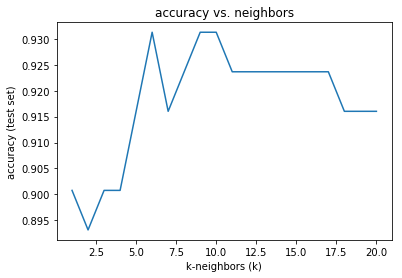

In [13]:
plt.figure(figsize=(6,4))
plt.plot(neighbors, knn_accuracy)
plt.xlabel('k-neighbors (k)')
plt.ylabel('accuracy (test set)')
plt.title('accuracy vs. neighbors')

- k= 6,9, & 10 look to give the highest accuracy 

## challenge4
- Make a similar model but with `LogisticRegression` instead, calculate test accuracy.


In [14]:
# fit logistic on the training set, and test it to find accuracy
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_prediction = logistic_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
print (logistic_accuracy)

0.9389312977099237


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## challenge5
- Make a bar graph of democrats and republicans. How many of each are there? Make a very simple predictor that predicts 'democrat' for every incoming example. Just make a function that takes in an X --an array or matrix with input examples--, and returns an array of the same length as X, where each value is 'democrat'. For example, if X is three rows, your function should return ['democrat','democrat','democrat']. Make a y_predicted vector using this and measure its accuracy. Do the same with predicting 'republican' all the time and measure its accuracy.



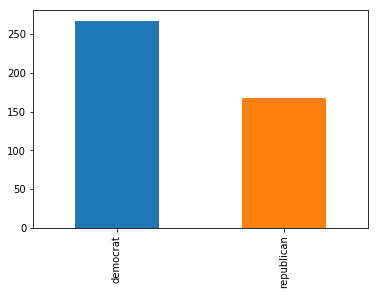

In [15]:
# bar graph of dems vs. republicans
counts=congressional_votes['party'].value_counts().plot.bar()


In [16]:
# function that predicts everyone is a democrat
def dem(X):
    return ['democrat' for _ in range(len(X))]

dem_prediction = dem(X_test)
dem_accuracy = accuracy_score(y_test, dem_prediction)
print (dem_accuracy)

0.5877862595419847


In [18]:
# function that predicts everyone is a republican 
# _  to just get the length of X, not its content
def repub(X):
    return ['republican' for _ in range(len(X))]

repub_prediction = repub(X_test)
repub_accuracy = accuracy_score(y_test, repub_prediction)
print (repub_accuracy)

0.4122137404580153


## challenge6
- Plot the accuracies as a function of k. Since k only matters for KNN, your logistic regression accuracy, 'democrat' predictor accuracy and 'republican' predictor accuracy will stay the same over all k, so each of these three will be a horizontal line. But the KNN accuracy will change with k.

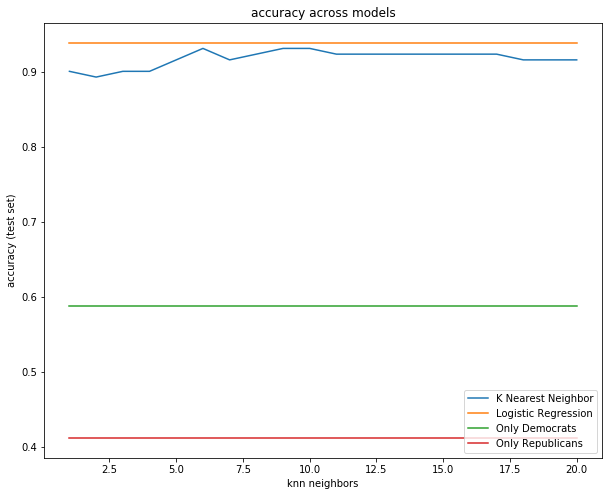

In [19]:
plt.figure(figsize=(10,8))
plt.plot(neighbors, knn_accuracy, '-', label='K Nearest Neighbor')
plt.plot(neighbors, [logistic_accuracy]*20, '-', label='Logistic Regression')
plt.plot(neighbors, [dem_accuracy]*20, '-', label='Only Democrats')
plt.plot(neighbors, [repub_accuracy]*20, '-', label='Only Republicans')
plt.title('accuracy across models')
plt.xlabel('knn neighbors')
plt.ylabel('accuracy (test set)')
plt.legend(loc='lower right')

## challenge7
- Plot a learning curve for the logistic regression model. But instead of going through the painstaking steps of doing it yourself, use this function:


In [20]:
[m, train_score, test_score] = learning_curve(logistic_reg, congressional_votes.drop(['party'], axis=1), congressional_votes['party'])
train_cv_err = np.mean(train_score, axis=1)
test_cv_err = np.mean(test_score, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

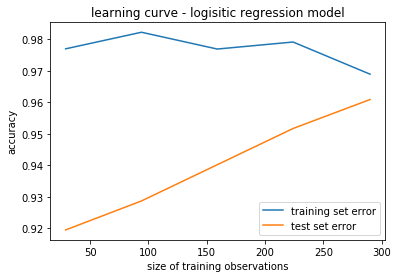

In [21]:
plt.plot(m, train_cv_err, label='training set error')
plt.plot(m, test_cv_err, label='test set error')
plt.title('learning curve - logisitic regression model')
plt.xlabel('size of training observations')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

- Plot learning curve for KNN with the best k value

In [22]:
# use KNeighborsClassifier with k=2 because that gave our best k from above
[m, train_score, test_score] = learning_curve(KNeighborsClassifier(2), congressional_votes.drop(['party'], axis=1), congressional_votes['party'])
train_cv_err = np.mean(train_score, axis=1)
test_cv_err = np.mean(test_score, axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


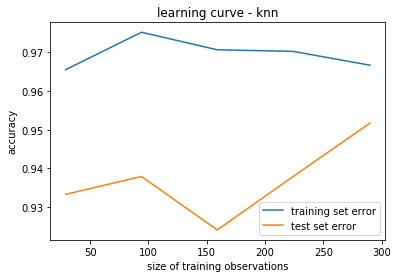

In [23]:
plt.plot(m, train_cv_err, label='training set error')
plt.plot(m, test_cv_err, label='test set error')
plt.title('learning curve - knn')
plt.xlabel('size of training observations')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

## challenge8
- Use each of these to classify your data and print the test accuracy of each: Gaussian Naive Bayes, SVM (Support Vector Machine) Classifier, Decision Tree, Random Forest

In [24]:
# Guassian Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predict)
print (gnb_accuracy)

0.9389312977099237


In [25]:
# SVM Classifier
svm = SVC(probability=True)
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predict)
print (svm_accuracy)

0.9541984732824428


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predict)
print (dt_accuracy)

0.9389312977099237


In [27]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_predict = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
print (rf_accuracy)

0.9618320610687023


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## challenge9
- Just like the `learning_curve` function, this takes a classifier object, `X` and `Y`. Returns accuracy (or whatever score you prefer by using the _scoring_ keyword argument). Of course, it will return a score for each cross validation fold, so to get the generalized accuracy, you need to take the mean of what it returns. Use this function to calculate the cross validation score of each of the classifiers you tried before.



In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
gnb_cross_val = np.mean(cross_val_score(gnb, X, y))
svm_cross_val = np.mean(cross_val_score(svm, X, y))
dt_cross_val = np.mean(cross_val_score(dt, X, y))
rf_cross_val = np.mean(cross_val_score(rf, X, y))

print ('Gaussian Cross Val Score:', gnb_cross_val)
print ('SVM Cross Val Score:', svm_cross_val)
print ('Decision Tree Cross Val Score:', dt_cross_val)
print ('Random Forest Cross Val Score:', rf_cross_val)

Gaussian Cross Val Score: 0.9310344827586207
SVM Cross Val Score: 0.9540229885057472
Decision Tree Cross Val Score: 0.9494252873563217
Random Forest Cross Val Score: 0.9540229885057471


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framewo

## challenge10
- Instead of 'democrat' or 'republican', can you predict the vote of a representative based on their other votes?

- Reload the data from scratch. Convert y-->1, n-->0.

- Choose one vote. Build a classifier (logistic regression or KNN), that uses the other votes (do not use the party as a feature) to predict if the vote will be 1 or 0.

- Convert each ? to the mode of the column (if a senator has not voted, make their vote 1 if most others voted 1, make it 0 if most others voted 0).

- Calculate the cross validation accuracy of your classifier for predicting how each representative will vote on the issue.

In [31]:
columns = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
new_congressional_votes = pd.read_csv("/Users/andreewerner/Desktop/house-votes-84.data", names=columns)

In [32]:
## Change y's and 1's to n's and 0's
new_congressional_votes.replace(to_replace='y', value=1, inplace=True)
new_congressional_votes.replace(to_replace='n', value=0, inplace=True)

In [33]:
## Replace all ?'s with the mode
new_congressional_votes.replace(to_replace='?', value=np.nan, inplace=True)
new_congressional_votes.fillna(new_congressional_votes.mode().iloc[0], inplace=True)
new_congressional_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [34]:
# define feature matrix and target y for the education-spending bill
new_X = new_congressional_votes.drop(['party', 'education'],axis=1)
new_y = new_congressional_votes['education']


In [35]:
new_logistic_reg = LogisticRegression()
new_logistic_reg.fit(new_X, new_y)
logistic_cross_val = np.mean(cross_val_score(new_logistic_reg, new_X,new_y))
print (logistic_cross_val)

0.8436781609195402


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

## challenge11
- Back to movie data! Choose one categoric feature to predict. I chose MPAA Rating, but genre, month, etc. are all decent choices. If you don't have any non-numeric features, you can make two bins out of a numeric one (like "Runtime>100 mins" and "Runtime<=100 mins")

- Make a bar graph of how many of each movie there is in the data. For example, with Ratings, show how many G, PG, PG-13, R movies there are, etc. (basically a histogram of your labels).

- Predict your outcome variable (labels) using KNN and logistic regression. Calculate their accuracies.

- Make a baseline stupid predictor that always predicts the label that is present the most in the data. Calculate its accuracy on a test set.

- How much better do KNN and logistic regression do versus the baseline?

- What are the coefficients of logistic regression? Which features affect the outcome how?

In [36]:
movies = pd.read_csv('/Users/andreewerner/Desktop/2013_movies.csv')
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


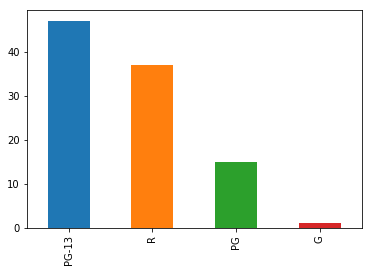

In [37]:
movies['Rating'].value_counts().plot.bar()


In [38]:
movies = movies.dropna()
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movies['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [39]:
# knn predictions and accuracy
knn_movies = KNeighborsClassifier(5)
knn_movies.fit(X_train, y_train)
knn_prediction = knn_movies.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_prediction)
# knn_cv_movies = cross_val_score(knn_movies, X_movies, y_movies)

print (knn_prediction)
print (knn_accuracy)

['R' 'PG-13' 'R' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'R' 'R' 'PG-13' 'PG-13'
 'PG-13' 'PG-13' 'R' 'R' 'PG-13' 'R' 'PG-13' 'R' 'R' 'R' 'R' 'PG-13'
 'PG-13' 'PG-13' 'R' 'PG']
0.5555555555555556


In [40]:
# logistic predictions and accuracy 
logistic_movies = LogisticRegression()
logistic_movies.fit(X_train, y_train)
logistic_prediction = logistic_movies.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_prediction)
print (logistic_prediction)
print (logistic_accuracy)

['PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'R' 'R' 'PG-13'
 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'R' 'PG-13' 'R' 'PG-13' 'PG-13' 'PG-13'
 'PG-13' 'R' 'PG-13' 'PG-13' 'PG-13' 'PG-13' 'PG-13']
0.4444444444444444


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [41]:
# baseline predictor that predicts PG-13 movies 
pg13 = [y.mode()]*len(y_test)
baseline = accuracy_score(y_test, pg13)
print (baseline)


0.4074074074074074


In [43]:
print ((knn_accuracy-baseline)/baseline*100) #knn does 36% better than baseline
print ((logistic_accuracy-baseline)*100/baseline) #knn does 9% better than baseline

36.363636363636374
9.09090909090909


- the coefficients from logistic regression give us information about the attributes' relationship to target. A positive coefficient suggests a positive relationship. And a negative coefficient suggests a negative relationship

In [44]:
logistic_movies.coef_


array([[-1.46124379e-08, -1.93897623e-09, -1.75965536e-13],
       [ 1.49848414e-08, -6.42667083e-09, -9.13751595e-14],
       [-2.30763200e-08,  5.12598612e-09,  1.16458130e-13]])

## challenge12

 * What is the average and standard deviation of the age of all of the patients?
 * What is the average and standard deviation of the age of those patients that survived 5 or more years after surgery?
 * What is the average and standard deviation of the age of those patients who survived fewer than 5 years after surgery?
 * Plot a histogram of the ages side by side with a histogram of the number of axillary nodes.
 * What is the earliest year of surgery in this dataset?
 * What is the most recent year of surgery?
 * Use logistic regression to predict survival after 5 years. How well does your model do?
 * What are the coefficients of logistic regression? Which features affect the outcome how?
 * Draw the learning curve for logistic regression in this case.


In [45]:
columns = ['age', 'year', 'nodes', 'survival']
surgery = pd.read_csv('/Users/andreewerner/Desktop/haberman.data', names=columns)


In [46]:
# mean and st. dev. of age 
print (np.mean(surgery['age']))
print (np.std(surgery['age']))


52.45751633986928
10.785785203631832


In [47]:
five_or_more = surgery[surgery['survival'] == 1]
print ('average age of patients that survived 5+ yrs', (np.mean(five_or_more['age'])))
print ('standard deviation of age of patients that survived 5+ yrs:', (np.std(five_or_more['age'])))

average age of patients that survived 5+ yrs 52.01777777777778
standard deviation of age of patients that survived 5+ yrs: 10.987655475100508


In [48]:
no_survive = surgery[surgery['survival'] == 2]
print ('average age of patients that did not survive after 5 yrs', np.mean(no_survive['age']))
print ('standard deviation of age of patients that did not survive after 5 yrs', np.std(no_survive['age']))

average age of patients that did not survive after 5 yrs 53.67901234567901
standard deviation of age of patients that did not survive after 5 yrs 10.104182193031312


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11de0bd68>,
      dtype=object)

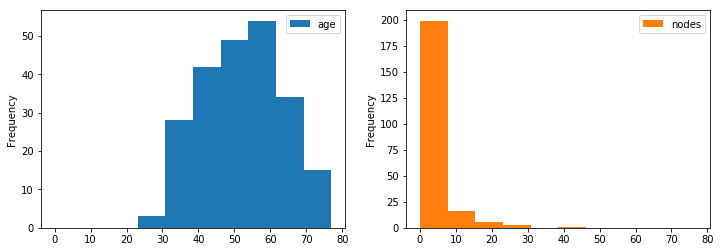

In [51]:
# Histograms side by side
five_or_more[['age', 'nodes']].plot(kind='hist', subplots=True, layout=(1,2), figsize=(12,4))

In [52]:
# earliest year of surgery: 1958
print (min(five_or_more['year']))

# most recent year of surgery: 1969
print (max(five_or_more['year']))

58
69


In [53]:
# how logistic regression model predicts survival after 5+ years
X = surgery.drop(['survival'], axis=1)
y = surgery['survival']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


In [54]:
surgery_logistic = LogisticRegression()
surgery_logistic.fit(X_train, y_train)
surgery_prediction = surgery_logistic.predict(X_test)
surgery_accuracy = accuracy_score(y_test, surgery_prediction)
print (surgery_accuracy)

0.8152173913043478


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
# logistic regressions coefficients - age and nodes have positive correlation with survival rate, but time has negative one
surgery_logistic.coef_

array([[ 0.0155515 , -0.02899279,  0.07136197]])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

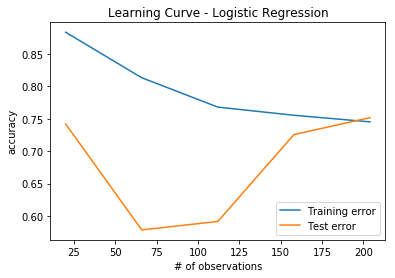

In [56]:
# plotting learning curve
[m, training_score, test_score] = learning_curve(surgery_logistic, X, y)
training_score = np.mean(training_score, axis=1)
test_score = np.mean(test_score, axis=1)
plt.plot(m, training_score, label='Training error')
plt.plot(m, test_score, label='Test error')
plt.title('Learning Curve - Logistic Regression')
plt.xlabel('# of observations')
plt.ylabel('accuracy')
plt.legend(loc='lower right')


## CHALLENGE 8

## challenge1
- For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).


In [57]:
columns = ['party', 'handicap', 'water', 'budget', 'physician', 'elsavador', 'religion', 'satellite', 'nicaraguan',
               'missile', 'immigration', 'snyfuels', 'education', 'superfund', 'crime', 'dutyfree', 'export']
congressional_votes = pd.read_csv("/Users/andreewerner/Desktop/house-votes-84.data", names=columns)

In [58]:
# Change y's and 1's to n's and 0's
congressional_votes.replace(to_replace='y', value=1, inplace=True)
congressional_votes.replace(to_replace='n', value=0, inplace=True)

# Change republican to 1's and democrat to 0's
congressional_votes.replace(to_replace='republican', value=1, inplace=True)
congressional_votes.replace(to_replace='democrat', value=0, inplace=True) 

# Replace all ?'s with the mean
congressional_votes.replace(to_replace='?', value=np.nan, inplace=True)
congressional_votes.fillna(congressional_votes.mean(), inplace=True)
congressional_votes.head()

,party,handicap,water,budget,physician,elsavador,religion,satellite,nicaraguan,missile,immigration,snyfuels,education,superfund,crime,dutyfree,export
0,1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,1,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,0,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,0,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,0,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [59]:
# define features and target
X = congressional_votes.drop(['party'], axis=1)
y = congressional_votes['party']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


In [60]:
models = [KNeighborsClassifier(6), LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
names = ['knn', 'logistic', 'gnb', 'svm', 'dt', 'rf']

accuracy = []
precision_repub = []
precision_dem = []
recall_repub = []
recall_dem = []
f1_repub = []
f1_dem = []



In [61]:
# getting accuracy, precision, recall and f1 for all models 

for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    accuracy.append(accuracy_score(y_test,y_pred))
    precision_repub.append(precision_score(y_test,y_pred,pos_label=1))
    precision_dem.append(precision_score(y_test,y_pred,pos_label=0))
    recall_repub.append(recall_score(y_test,y_pred,pos_label=1))
    recall_dem.append(recall_score(y_test,y_pred,pos_label=0))
    f1_repub.append(f1_score(y_test,y_pred,pos_label=1))
    f1_dem.append(f1_score(y_test,y_pred,pos_label=0))

models_df = pd.DataFrame({'accuracy':accuracy, 'precision-repub':precision_repub, 'precision-dem':precision_dem,
                            'recall-repub':recall_repub, 'recall-dem':recall_dem, 'f1-repub':f1_repub, 'f1-dem':f1_dem})
models_df.set_index([names])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,accuracy,precision-repub,precision-dem,recall-repub,recall-dem,f1-repub,f1-dem
knn,0.931298,0.941176,0.925000,0.888889,0.961039,0.914286,0.942675
logistic,0.938931,0.960000,0.925926,0.888889,0.974026,0.923077,0.949367
gnb,0.938931,0.979167,0.915663,0.870370,0.987013,0.921569,0.950000
svm,0.954198,0.961538,0.949367,0.925926,0.974026,0.943396,0.961538
dt,0.946565,0.960784,0.937500,0.907407,0.974026,0.933333,0.955414
rf,0.923664,0.940000,0.913580,0.870370,0.961039,0.903846,0.936709


## challenge2
- For each, draw the ROC curve and calculate the AUC.


In [62]:
y_test = np.array(y_test)
y_test

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

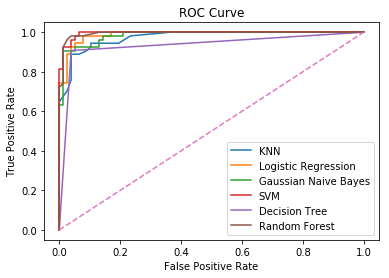

In [63]:

# KNN
fpr, tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

# Logistic Regression
fpr, tpr, _ = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

# Gaussian Naive Bayes
fpr, tpr, _ = roc_curve(y_test, gnb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

# SVM
fpr, tpr, _ = roc_curve(y_test, svm.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

# Decision Tree
fpr, tpr, _ = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

# Random Forest
fpr, tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['KNN', 'Logistic Regression','Gaussian Naive Bayes','SVM','Decision Tree','Random Forest'])

In [64]:
# AUC calculation
from sklearn.metrics import roc_auc_score

auc_knn=roc_auc_score(y_test,knn.predict_proba(X_test)[:,1])
auc_logistic=roc_auc_score(y_test,logistic_reg.predict_proba(X_test)[:,1])
auc_gnb=roc_auc_score(y_test,gnb.predict_proba(X_test)[:,1])
auc_svm=roc_auc_score(y_test,svm.predict_proba(X_test)[:,1])
auc_dt=roc_auc_score(y_test,dt.predict_proba(X_test)[:,1])
auc_rf=roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])

print ('knn AUC:', auc_knn)
print ('logistic regression AUC:', auc_logistic)
print ('Gaussian Naive Bayes AUC:', auc_gnb)
print ('SVM AUC:', auc_svm)
print ('Decision Tree AUC:', auc_dt)
print ('Random Forest AUC:', auc_rf)

knn AUC: 0.9737854737854738
logistic regression AUC: 0.9877344877344877
Gaussian Naive Bayes AUC: 0.9841269841269841
SVM AUC: 0.994949494949495
Decision Tree AUC: 0.9342231842231842
Random Forest AUC: 0.9942279942279941


## challenge3
- Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

In [65]:
cross_val_score_df = pd.DataFrame()

for score in ['accuracy', 'recall', 'precision', 'f1']:
    scores = []
    for model in models:
        scores.append(np.mean(cross_val_score(model, X, y, scoring=score)))
    cross_val_score_df[score] = scores

cross_val_score_df.set_index([names])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defa

,accuracy,recall,precision,f1
knn,0.933333,0.934524,0.897096,0.915323
logistic,0.960920,0.952381,0.949399,0.950059
gnb,0.931034,0.916667,0.908613,0.911185
svm,0.954023,0.964286,0.922271,0.942184
dt,0.947126,0.934524,0.935937,0.944345
rf,0.960920,0.970238,0.953519,0.950109


## challenge4
- For your movie classifiers, calculate the precision and recall for each class.


In [66]:
movies = pd.read_csv('/Users/andreewerner/Desktop/2013_movies.csv')
movies = movies.dropna()
movies.shape

# feature matrix X and target y - movie rating
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]
y = movies['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [67]:
# knn model - precision and recall scores for R, PG13, PG movies
# choose k=5 because that gave highest accuracy score in Challenge7, part 11.
knn_model = KNeighborsClassifier(5)
knn_model.fit(X_train, y_train)
knn_prediction = knn_model.predict(X_test)

print ('R, PG13, PG', precision_score(y_test, knn_prediction, average=None))
print ('R, PG13, PG', recall_score(y_test, knn_prediction, average=None))


R, PG13, PG [0.         0.5        0.66666667]
R, PG13, PG [0.         0.63636364 0.72727273]


In [68]:
# logistic regression model - precision and recall scores for R, PG13, PG movies
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_prediction = logistic_model.predict(X_test)

print ('R, PG13, PG', precision_score(y_test, logistic_prediction, average = None))
print ('R, PG13, PG', recall_score(y_test, logistic_prediction, average = None))


R, PG13, PG [0.         0.40909091 0.6       ]
R, PG13, PG [0.         0.81818182 0.27272727]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## challenge5
- Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.


In [440]:
columns = ['age', 'year', 'nodes', 'survival']
surgery = pd.read_csv('/Users/andreewerner/Desktop/haberman.data', names=columns)

Logistic Regression AUC: 0.6475225225225226


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


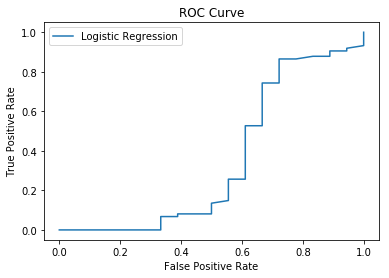

In [69]:
# define features and target survival
X = surgery.drop(['survival'], axis=1)
y = surgery['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

y_pred = logistic_reg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, logistic_reg.predict_proba(X_test)[:,1], pos_label=1) #label of 1 corresponds to patients that survived 5+ yrs 
plt.plot(fpr, tpr)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression'])

#AUC calcualation
auc_logistic = roc_auc_score(y_test, surgery_logistic.predict_proba(X_test)[:,1])
print ('Logistic Regression AUC:', auc_logistic)